In [63]:
import pandas as pd
import nltk
import re
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from nltk.stem import WordNetLemmatizer
from joblib import dump, load

nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

# Index
* [EDA](#EDA)
    * [General Exploration](#General-Exploration)
        * [Data Types](#Data-Types)
        * [Length of Dataset and Missing Values](#Length-of-Dataset-and-Missing-Values)
    * [Categorical Analysis](#Categorical-Analysis)
        * [Analysing the "Description" Column](#Analysing-the-"Description"-Column)
        * ["Category" Column](#"Category"-Column)
        * [Ordinality of Categorical Data](#Ordinality-of-Categorical-Data)
    * [Numerical Analysis](#Numerical-Analysis)
        * [Mean and Standard Deviation](#Mean-and-Standard-Deviation)
        * [Distribution of Features](#Distribution-of-Features)
        * [Outliers](#Outliers)
    * [Conclusion](#Conclusion)
* [Preprocessing](#Preprocessing)
    * [Saving Dataset](#Saving-Dataset)
    * [ChatGPT](#ChatGPT)

<a name="EDA"></a>
# EDA
In this part we are going to see the data. We are not going to modify it. Lets check for:
* types of data
* missing values

## General Exploration
[Index](#Index)

[`read_csv`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html)

In [64]:
dataframe=pd.read_csv('/tf/ML-project/data/food.csv')
dataframe.head(2)

,Category,Description,Nutrient Data Bank Number,Data.Alpha Carotene,Data.Ash,Data.Beta Carotene,Data.Beta Cryptoxanthin,Data.Carbohydrate,Data.Cholesterol,Data.Choline,...,Data.Major Minerals.Potassium,Data.Major Minerals.Sodium,Data.Major Minerals.Zinc,Data.Vitamins.Vitamin A - IU,Data.Vitamins.Vitamin A - RAE,Data.Vitamins.Vitamin B12,Data.Vitamins.Vitamin B6,Data.Vitamins.Vitamin C,Data.Vitamins.Vitamin E,Data.Vitamins.Vitamin K
0,BUTTER,"BUTTER,WITH SALT",1001,0,2.11,158,0,0.06,215,19,...,24,576,0.09,2499,684,0.17,0.003,0.0,2.32,7.0
1,BUTTER,"BUTTER,WHIPPED,WITH SALT",1002,0,2.11,158,0,0.06,219,19,...,26,827,0.05,2499,684,0.13,0.003,0.0,2.32,7.0


### Data Types
[Index](#Index)

In [65]:
dataframe.dtypes.value_counts()

float64    25
int64      19
object      4
Name: count, dtype: int64

In [66]:
display(dataframe.select_dtypes(include=["object"]).head(2))
display(dataframe.select_dtypes(exclude=["object"]).head(2))

,Category,Description,Data.Household Weights.1st Household Weight Description,Data.Household Weights.2nd Household Weight Description
0,BUTTER,"BUTTER,WITH SALT",1 cup,1 tbsp
1,BUTTER,"BUTTER,WHIPPED,WITH SALT",1 cup,1 tbsp


,Nutrient Data Bank Number,Data.Alpha Carotene,Data.Ash,Data.Beta Carotene,Data.Beta Cryptoxanthin,Data.Carbohydrate,Data.Cholesterol,Data.Choline,Data.Fiber,Data.Kilocalories,...,Data.Major Minerals.Potassium,Data.Major Minerals.Sodium,Data.Major Minerals.Zinc,Data.Vitamins.Vitamin A - IU,Data.Vitamins.Vitamin A - RAE,Data.Vitamins.Vitamin B12,Data.Vitamins.Vitamin B6,Data.Vitamins.Vitamin C,Data.Vitamins.Vitamin E,Data.Vitamins.Vitamin K
0,1001,0,2.11,158,0,0.06,215,19,0.0,717,...,24,576,0.09,2499,684,0.17,0.003,0.0,2.32,7.0
1,1002,0,2.11,158,0,0.06,219,19,0.0,717,...,26,827,0.05,2499,684,0.13,0.003,0.0,2.32,7.0


### Length of Dataset and Missing Values
[Index](#Index)

In [67]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7413 entries, 0 to 7412
Data columns (total 48 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   Category                                                 7413 non-null   object 
 1   Description                                              7413 non-null   object 
 2   Nutrient Data Bank Number                                7413 non-null   int64  
 3   Data.Alpha Carotene                                      7413 non-null   int64  
 4   Data.Ash                                                 7413 non-null   float64
 5   Data.Beta Carotene                                       7413 non-null   int64  
 6   Data.Beta Cryptoxanthin                                  7413 non-null   int64  
 7   Data.Carbohydrate                                        7413 non-null   float64
 8   Data.Cholesterol            

## Categorical Analysis
[Index](#Index)

[`Series.apply`](https://pandas.pydata.org/docs/reference/api/pandas.Series.apply.html)

### Analysing the "Description" Column
[Index](#Index)

In [68]:
for i in dataframe["Description"][:10]:
  print(i)

BUTTER,WITH SALT
BUTTER,WHIPPED,WITH SALT
BUTTER OIL,ANHYDROUS
CHEESE,BLUE
CHEESE,BRICK
CHEESE,BRIE
CHEESE,CAMEMBERT
CHEESE,CARAWAY
CHEESE,CHEDDAR
CHEESE,CHESHIRE


### "Category" Column
[Index](#Index)

In [69]:
for i in dataframe["Category"].unique()[:10]:
  print(i)

BUTTER
BUTTER OIL
CHEESE
CHEESE FD
CHEESE SPRD
CREAM
No Category
SOUR DRSNG
MILK
CREAM SUB


### Ordinality of Categorical Data
[Index](#Index)

In [70]:
dataframe.select_dtypes(include=["object"]).nunique()

Category                                                   1183
Description                                                7409
Data.Household Weights.1st Household Weight Description     818
Data.Household Weights.2nd Household Weight Description     763
dtype: int64

## Numerical Analysis
[Index](#Index)

### Mean and Standard Deviation
[Index](#Index)

In [71]:
dataframe.describe().transpose()[['mean', 'std']]

,mean,std
Nutrient Data Bank Number,14116.443680,8767.416214
Data.Alpha Carotene,21.210711,269.714183
Data.Ash,1.852459,2.993228
Data.Beta Carotene,159.043437,1126.285026
Data.Beta Cryptoxanthin,8.776744,154.184860
Data.Carbohydrate,21.785381,27.123491
Data.Cholesterol,37.162822,119.738438
Data.Choline,20.673546,45.481990
Data.Fiber,1.993147,4.292873
Data.Kilocalories,219.655875,171.668713


### Distribution of Features
[Index](#Index)

[`kdeplot`](https://seaborn.pydata.org/generated/seaborn.kdeplot.html)
[`tick_params`](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.tick_params.html)

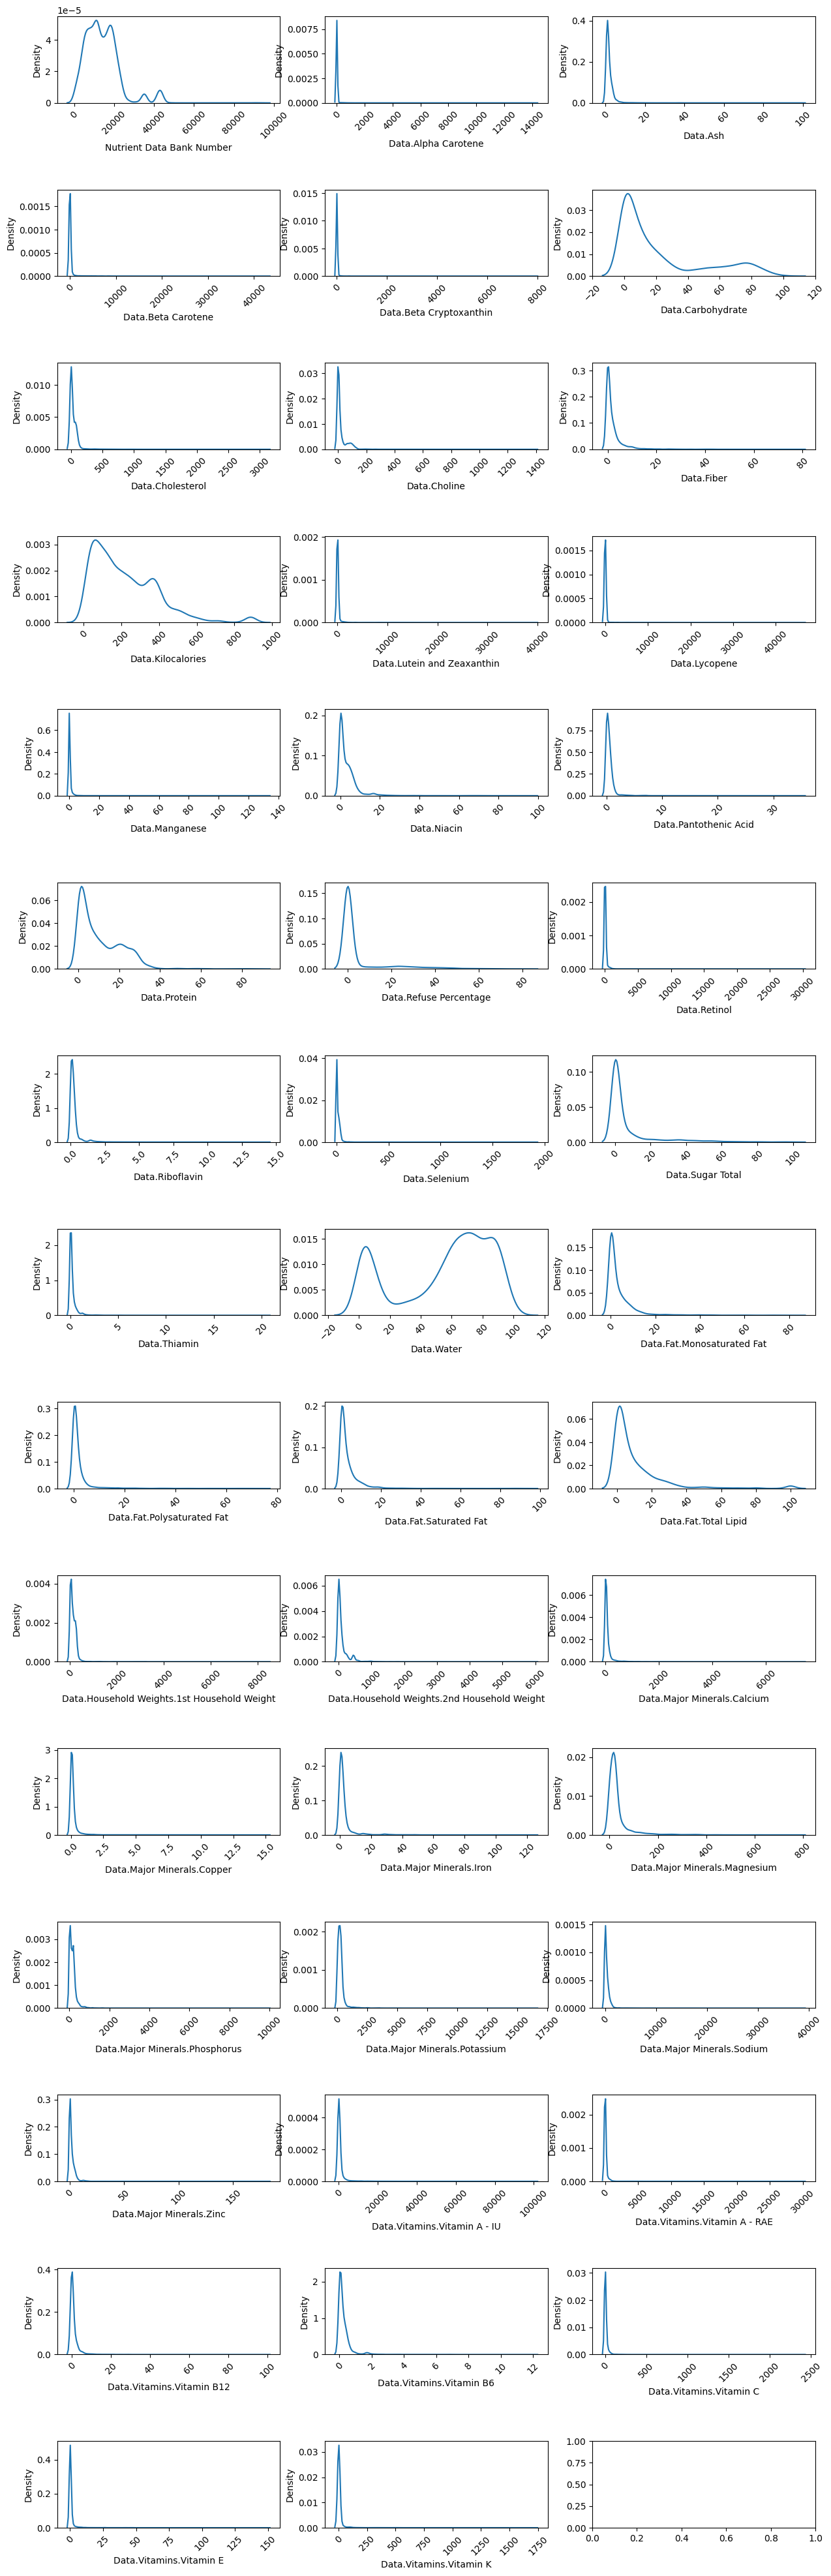

In [72]:
numericalColumns = dataframe.select_dtypes(exclude=["object"]).columns

fig, axs = plt.subplots(15, 3, figsize=(15, 50))
for ax,columnName in zip(axs.flatten(),numericalColumns):
  sns.kdeplot(data=dataframe, x=columnName,ax=ax)
  ax.tick_params(axis='x', rotation=45)

fig.subplots_adjust(hspace=1)

### Outliers
[Index](#Index)

[`subplots`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html)
[`flatten`](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.flatten.html)
[`boxplot`](https://seaborn.pydata.org/generated/seaborn.boxplot.html)

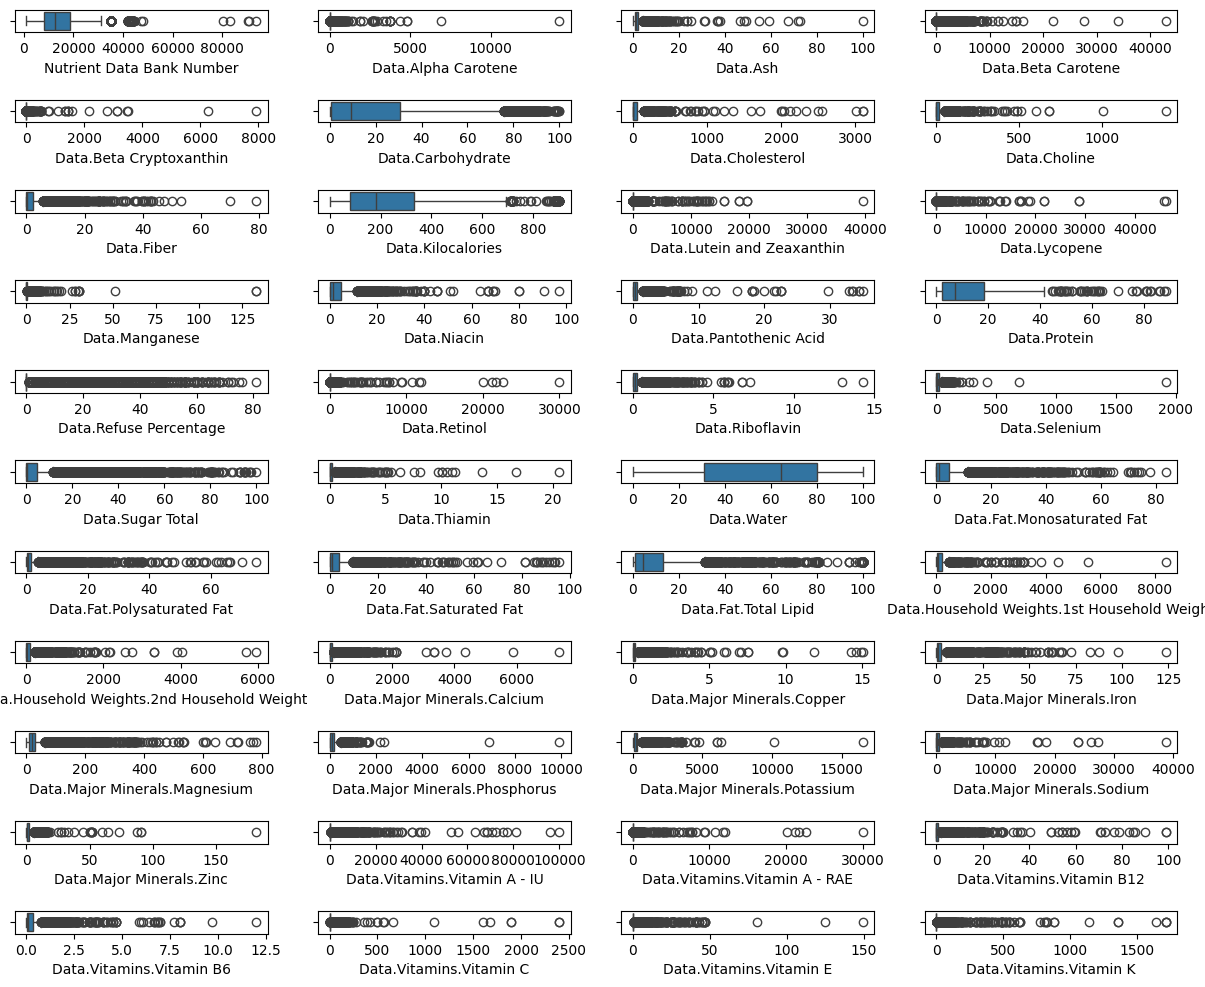

In [73]:
numericalColumns = dataframe.select_dtypes(exclude=["object"]).columns

fig, axs = plt.subplots(11, 4, figsize=(15, 12))
for ax,column_name in zip(axs.flatten(),numericalColumns):
  sns.boxplot(x=dataframe[column_name],ax=ax)

fig.subplots_adjust(hspace=3)

## Conclusion
[Index](#Index)
* The targets are `Data.Fat.Monosaturated Fat`, `Data.Fat.Polysaturated Fat`, `Data.Fat.Saturated Fat`, and `Data.Fat.Total Lipid`   

**Categorical Data**
* The cardinality of the categorical data is pretty high
* `Data.Household Weights.1st Household Weight Description` and `Data.Household Weights.2nd Household Weight Description` have missing values
* `Category` is the only one that have meaninful information

**Numerical Data**
* Lot of outliers
* No missing values
* There are some columns that has high deviation. Needs to be normalized


# Preprocessing
[Index](#Index)

In [81]:
class PreprocessingPipeline:
  def __init__(self,dataframe):
    fatList = [
      "Data.Fat.Monosaturated Fat",
      "Data.Fat.Polysaturated Fat",
      "Data.Fat.Saturated Fat",
      "Data.Fat.Total Lipid"
    ]
    self.categoricalDataframe = dataframe.select_dtypes(include= ["object"])
    self.numericalDataframe =dataframe.select_dtypes(exclude=["object"])
    self.finalDataframe = pd.DataFrame()

  def removeColumns(self):
    # remove description columns
    self.categoricalDataframe.drop(
        inplace=True,
        columns=[
            "Data.Household Weights.1st Household Weight Description",
            "Data.Household Weights.2nd Household Weight Description",
            "Description"])
    # remove fat columns that contains redundant information
    self.numericalDataframe.drop(
        inplace=True,
        columns=[
          "Data.Fat.Monosaturated Fat",
          "Data.Fat.Polysaturated Fat",
          "Data.Fat.Saturated Fat",
      ]
    )

  def removeOutliers(self,dont=["Data.Fat.Total Lipid"]):

    def removeOutliers2(ser):
      Q1=ser.quantile(.25)
      Q3=ser.quantile(.75)
      IQR=Q3-Q1
      lower = float(Q1-IQR*1.5)
      upper = float(Q3+IQR*1.5)

      def modify_value(value):
          if(value<lower):
              return float(lower)
          elif(upper<value):
              return float(upper)
          else:
              return float(value)

      return ser.apply(modify_value)

    for columnName in self.numericalDataframe.columns:
        if columnName not in dont:
            self.numericalDataframe[columnName] = removeOutliers2(self.numericalDataframe[columnName])

  def reduceCardinalityOfCategory(self):
    def processTheText(text):
      text = text.lower() # to lower case
      text = re.split('[& -]',text)[0] # split
      text = WordNetLemmatizer().lemmatize(text, pos='n') # singular
      return text

    self.categoricalDataframe["Category"] = self.categoricalDataframe["Category"].apply(processTheText)

  def generateFinalDataframe(self):
    self.finalDataframe = pd.concat([self.categoricalDataframe,self.numericalDataframe],axis=1)

In [82]:
p = PreprocessingPipeline(dataframe)
p.removeColumns()
p.reduceCardinalityOfCategory()
p.removeOutliers('Data.Fat.Total Lipid')
p.generateFinalDataframe()

## Saving Dataset
[Index](#Index)

[`to_csv`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_csv.html)

In [85]:
p.finalDataframe.head(2)

,Category,Nutrient Data Bank Number,Data.Alpha Carotene,Data.Ash,Data.Beta Carotene,Data.Beta Cryptoxanthin,Data.Carbohydrate,Data.Cholesterol,Data.Choline,Data.Fiber,...,Data.Major Minerals.Potassium,Data.Major Minerals.Sodium,Data.Major Minerals.Zinc,Data.Vitamins.Vitamin A - IU,Data.Vitamins.Vitamin A - RAE,Data.Vitamins.Vitamin B12,Data.Vitamins.Vitamin B6,Data.Vitamins.Vitamin C,Data.Vitamins.Vitamin E,Data.Vitamins.Vitamin K
0,butter,1001.0,0.0,2.11,2.5,0.0,0.06,150.0,19.0,0.0,...,24.0,576.0,0.09,700.0,60.0,0.17,0.003,0.0,0.975,4.25
1,butter,1002.0,0.0,2.11,2.5,0.0,0.06,150.0,19.0,0.0,...,26.0,827.0,0.05,700.0,60.0,0.13,0.003,0.0,0.975,4.25


In [84]:
p.finalDataframe.to_csv('../data/processedDataframe.csv', index=False)

## ChatGPT
[Index](#Index)

In [77]:
dataframe["Category"].apply(lambda x:x+",").to_csv("../data/try.csv",index=False)

In [78]:
a = pd.read_csv("../data/fromLLM.csv")
a["category"].value_counts()

category
otros               7204
Lácteos              135
Aceites y grasas      74
Name: count, dtype: int64